
**Solving ODEs numerically**
*   Euler methods: theta_euler_explicit, euler_explicit, trapezoidal


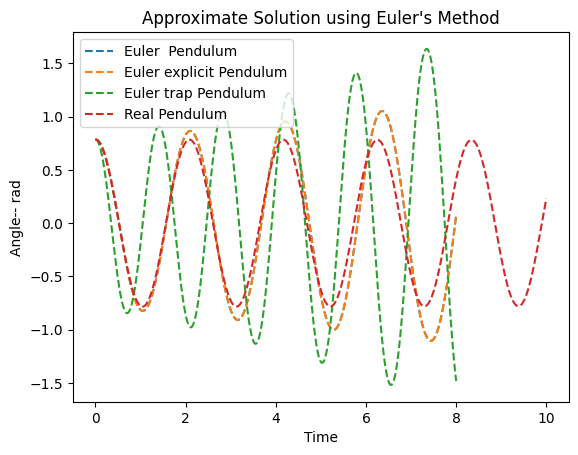

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# differential equation for the pendulum
def f(t, theta, omega):
    g = 9.81
    L = 1.0
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)
    return [dtheta_dt, domega_dt]


# Euler method
def euler_method(f, theta0, omega0, t0, dt, num_steps):
    theta_array = [theta0]
    omega_array = [omega0]
    y = [theta0, omega0]
    t_array = [t0]

    for i in range(num_steps):
        y += dt * np.array(f(t0, y[0], y[1]))
        theta_array.append(y[0])
        omega_array.append(y[1])
        t0 += dt
        t_array.append(t0)

    return t_array, theta_array


def euler_explicit(f, theta0, omega0, t0, dt, num_steps):
    theta_array = [theta0]
    omega_array = [omega0]
    y = [theta0, omega0]
    t_array = [t0]

    for i in range(num_steps):
        y += dt * np.array(f(t0, y[0], y[1]))
        theta_array.append(y[0])
        omega_array.append(y[1])
        t0 += dt
        t_array.append(t0)

    return theta_array, t_array


def trapezoidal(f, theta0, omega0, t0, dt, num_steps):
    theta_array = [theta0]
    omega_array = [omega0]
    y = [theta0, omega0]
    t_array = [t0]

    for i in range(num_steps):
        y_next = y + 0.5 * dt * np.array([y[1], -9.81/L*np.sin(y[0])])
        y += dt * np.array([y[1], -9.81/L*np.sin(y[0])]) + \
            0.5 * dt * np.array(f(t0, y[0], y[1]))

        theta_array.append(y[0])
        omega_array.append(y[1])
        t0 += dt
        t_array.append(t0)

    return theta_array, t_array



# initial conditions
theta0 = np.pi/4
omega0 = 0.0
num_steps = 800
dt = 0.01
t0 = 0.0

theta_euler_explicit, t_euler_explicit = euler_explicit(f, theta0, omega0, t0, dt, num_steps)

theta_trapezoidal, t_trapezoidal = trapezoidal(f, theta0, omega0, t0, dt, num_steps)

t_euler, theta_euler = euler_method(f, theta0, omega0, t0, dt, num_steps)

y0 = [np.pi/4, 0]
L = 1.0

sol = solve_ivp(lambda t, y: f(t, y[0], y[1]), [0, 10], y0, t_eval=np.linspace(0, 10, 1000))

plt.plot(t_euler, theta_euler, '--', label='Euler  Pendulum')
plt.plot(t_euler_explicit, theta_euler_explicit, '--', label='Euler explicit Pendulum')
plt.plot(t_trapezoidal, theta_trapezoidal, '--', label='Euler trap Pendulum')
plt.plot(sol.t, sol.y[0], '--', label='Real Pendulum')
plt.xlabel('Time')
plt.ylabel('Angle-- rad')
plt.title("Approximate Solution using Euler's Method")
plt.legend()
plt.show()


##Graphs of accuracy
Showing the accuracy of the diffrent methods over time.


Eq(y(t), 2/(C1*exp(-10*t) + 1))


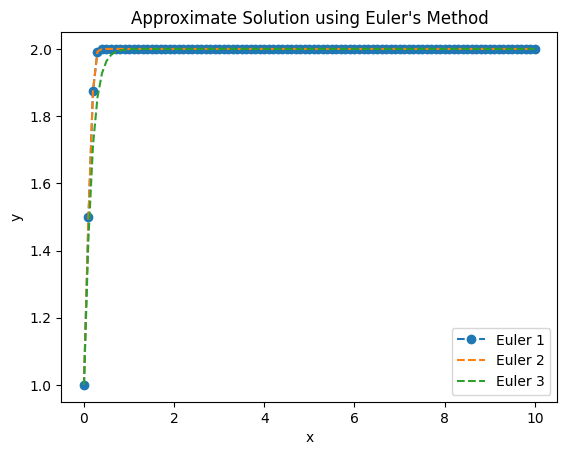

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

K = 2
r = 10
step_size = 0.1
num_steps = 100

def dydt(t, y):
    return r * y * (1 - y/K)

# Analytical method
def analytical_method(K, r, y0, t):
    return K*y0*np.exp(r*t)/(K + y0*(np.exp(r*t)-1))

# Euler Implementation 1: implicit
def euler_method_1(f, y0, steps_size, num_steps):
    # initialize
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    x[0] = 0
    y[0] = y0

    for i in range(num_steps):
        x[i+1] = x[i] + steps_size
        y[i+1] = y[i] + steps_size * f(x[i], y[i])
    return x, y

x1, y1 = euler_method_1(dydt, 1, step_size, num_steps)

# Euler Implementation 2: Explicit
def euler_method_2(f, y0, steps_size, num_steps):
    # initialize
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    x[0] = 0
    y[0] = y0

    for i in range(num_steps):
        x[i+1] = x[i] + steps_size
        y[i+1] = y[i] + steps_size * f(x[i + 1], y[i])
    return x, y

x2, y2 = euler_method_2(dydt, 1, step_size, num_steps)

# Euler Implementation 3: The trapezoidal method
def euler_method_3(f, y0, steps_size, num_steps):
    # initialize
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    x[0] = 0
    y[0] = y0

    for i in range(num_steps):
        x[i+1] = x[i] + steps_size
        y[i+1] = y[i] + steps_size/2 * (f(x[i], y[i]) + f(x[i+1], y[i]+steps_size*f(x[i], y[i])))
    return x, y

x3, y3 = euler_method_3(dydt, 1, step_size, num_steps)

#Sympy
import sympy as sp

# define variables and parameters
t = sp.symbols('t')
y = sp.Function('y')(t)
K = 2
r = 10
# define the ODE
ode = sp.Eq(y.diff(t), r*y*(1-y/K))
# solve the ODE
sol = sp.dsolve(ode)
# print the solution
print(sol)

#NOTE: then we need to solve for C1

#Anylytical method is on paper


# plot
plt.plot(x1, y1, 'o--', label='Euler 1')
plt.plot(x2, y2, '--', label='Euler 2')
plt.plot(x3, y3, '--', label='Euler 3')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Approximate Solution using Euler's Method")
plt.legend()
plt.show()

